# <font color=blue>Assignments for "Cross Validation"</font>

In this assignment, you are going to measure the performance of the model you created with the Titanic dataset in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate your model's performance with cross validation and using different metrics.
- Determine the model with the most appropriate parameters by hyperparameter tuning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import cross_validate, cross_val_score

In [2]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression(solver='liblinear')
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [3]:
titanic = pd.read_csv("../../data/logistic regression/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.drop(columns=['PassengerId','Name','Cabin','Ticket'],inplace=True)

In [5]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])

In [6]:
titanic['Pclass']=titanic['Pclass'].astype("object")

var_numeric=titanic.select_dtypes(include=['float64','int64'])
var_cat=titanic.select_dtypes(include=['object'])
var_dummies=pd.get_dummies(var_cat,drop_first=True)

var_regress=pd.concat([var_numeric,var_dummies],axis=1)
var_regress.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [7]:
X = var_regress.drop('Survived',axis=1)
y = var_regress['Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=95)

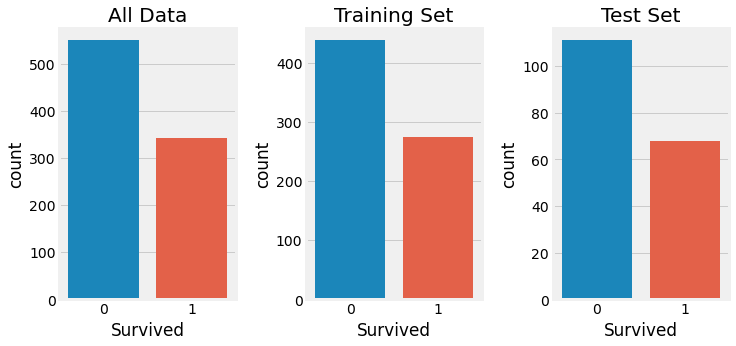

Proportion of '0' in all data     : %62 
Proportion of '0' in training set : %62 
Proportion of '0' in test set     : %62 


In [9]:
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
plt.subplots_adjust(wspace=0.4)

plt.subplot(131)
sns.countplot(y)
plt.title("All Data")

plt.subplot(132)
sns.countplot(y_train)
plt.title("Training Set")

plt.subplot(133)
sns.countplot(y_test)
plt.title("Test Set")

plt.show()

print("Proportion of '0' in all data     : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Proportion of '0' in training set : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))
print("Proportion of '0' in test set     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))

**BUILD LOGISTIC REGRESSION MODEL**

In [10]:
create_model(X,y)

Accuracy : 0.7597765363128491

Train Dataset
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       439
           1       0.80      0.70      0.75       273

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.81       712

Test Dataset
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       110
           1       0.72      0.62      0.67        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.76      0.76      0.76       179



**BUILD LOGISTIC REGRESSION MODEL WITH CV**

In [11]:
log_reg_model = LogisticRegression(solver="liblinear")

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                    scoring=['accuracy','precision','recall','r2']
                   )
print('Train Set Mean Accuracy  : {:.2f}  '.format(cv['train_accuracy'].mean()))
print('Train Set Mean R-square  : {:.2f}  '.format(cv['train_r2'].mean()))
print('Train Set Mean Precision : {:.2f}'.format(cv['train_precision'].mean()))
print('Train Set Mean Recall    : {:.2f}\n'.format(cv['train_recall'].mean()))

print('Test Set Mean Accuracy   : {:.2f}  '.format(cv['test_accuracy'].mean()))
print('Test Set Mean R-square   : {:.2f}  '.format(cv['test_r2'].mean()))
print('Test Set Mean Precision  : {:.2f}  '.format(cv['test_precision'].mean()))
print('Test Set Mean Recall     : {:.2f}'.format(cv['test_recall'].mean()))

Train Set Mean Accuracy  : 0.81  
Train Set Mean R-square  : 0.18  
Train Set Mean Precision : 0.78
Train Set Mean Recall    : 0.69

Test Set Mean Accuracy   : 0.80  
Test Set Mean R-square   : 0.16  
Test Set Mean Precision  : 0.78  
Test Set Mean Recall     : 0.68


**HYPERPARAMETER TUNING**

In [12]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [13]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

tuning= pd.DataFrame(columns=["cv_value", "C","Penalty","Score"])

for cv in (5,10,20):
    grid_cv= GridSearchCV(estimator=LogisticRegression(solver="liblinear"),
    param_grid=parameters,
    cv=cv                
    )
    grid_cv.fit(X, y)
    
    cv_value=cv
    c= grid_cv.best_params_['C']
    penalty=grid_cv.best_params_['penalty']
    score=grid_cv.best_score_
    tuning=tuning.append({"cv_value":cv, "C":c,"Penalty":penalty, "Score":score},ignore_index=True)

display(tuning)

,cv_value,C,Penalty,Score
0,5,0.1,l2,0.803622
1,10,0.1,l2,0.803583
2,20,10.0,l1,0.803586
